This script runs one param_set. Outputs results{}.csv and trialxtrial{}.csv

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from tqdm import tqdm
from sklearn import metrics
import pandas as pd

from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import normalize
from sklearn.linear_model import LogisticRegression
from scipy.special import logsumexp
from scipy.stats import norm
from glob import glob

In [2]:
from CSWSEM import generate_exp, seed_exp
# from vanilla_lstm import VanillaLSTM
from local_event_models import CSWEvent

%load_ext autoreload
%autoreload 2

TensorFlow Version: 2.3.1
TensorFlow Version: 2.3.1


### gridsearch params 

In [3]:
model_type        = str('LSTM')
lr                = float(0.05)
n_epochs          = int(1)    
log_alpha         = int(0)  # sCRP alpha is set in log scale
log_lambda        = int(0)  # sCRP lambda is set in log scale

In [4]:
seed = int(99)
condition = 'single'
n_train = 5
n_test = 5

### SEM configuration

In [5]:
optimizer_kwargs = dict(
    lr=lr, 
    beta_1=0.9, 
    beta_2=0.999, 
    epsilon=1e-5, 
    amsgrad=False
) 

f_opts=dict(
  batch_size=1, 
  batch_update=False, 
  dropout=0.0,
  l2_regularization=0.0, 
  n_epochs=n_epochs,
  optimizer_kwargs=optimizer_kwargs
)

sem_kwargs = dict(
  lmda=np.exp(log_lambda), 
  alfa=np.exp(log_alpha), 
  f_opts=f_opts, 
  f_class=CSWEvent
)


# Run model

main fun call

In [6]:
""" 
main fun call
"""
# for model_type in ['SEM','LSTM']:
for model_type in ['SEM']:
  print('---',model_type)
  results, trialXtrial, _ = seed_exp( 
                sem_kwargs, model_type=model_type, 
                n_train=n_train, n_test=n_test,
                condition=condition,seed=seed,
  )

--- SEM
seed 99 condition single
r_w_bound
i_f_bound
update single event
new obs
new obs
new obs
new obs
new obs
=
==
=== [[[ 0.          0.          0.          0.          0.
    0.          0.          0.          0.          0.        ]
  [ 0.          0.          0.          0.          0.
    0.          0.          0.          0.          0.        ]
  [-0.01494735  0.19530403 -0.57833197  0.18390609  0.29649683
    0.3064731  -0.50725446 -0.43831053  0.37517328  0.37569717]]]
train
=
==
=== [[[ 0.          0.          0.          0.          0.
    0.          0.          0.          0.          0.        ]
  [-0.01494735  0.19530403 -0.57833197  0.18390609  0.29649683
    0.3064731  -0.50725446 -0.43831053  0.37517328  0.37569717]
  [-0.15524039  0.58841061 -0.29502483  0.31795414  0.296199
   -0.17461211  0.08359864 -0.11275944 -0.29688749  0.41157892]]]
train
=
==
=== [[[-0.01494735  0.19530403 -0.57833197  0.18390609  0.29649683
    0.3064731  -0.50725446 -0.43831053  0.375

   -0.34557358  0.72317709 -0.02354282 -0.04155146  0.34660493]]]
train
update single event
new obs
new obs
new obs
new obs
new obs
=
==
=== [[[-0.03391172 -0.03360467 -0.41252725  0.52475002  0.13716024
    0.06537771  0.21813485  0.10558799  0.04784519  0.49137336]
  [-0.22923024  0.06954223 -0.50790511  0.3419433   0.6403929
   -0.34557358  0.72317709 -0.02354282 -0.04155146  0.34660493]
  [-0.01494735  0.19530403 -0.57833197  0.18390609  0.29649683
    0.3064731  -0.50725446 -0.43831053  0.37517328  0.37569717]]]
train
=
==
=== [[[-0.22923024  0.06954223 -0.50790511  0.3419433   0.6403929
   -0.34557358  0.72317709 -0.02354282 -0.04155146  0.34660493]
  [-0.01494735  0.19530403 -0.57833197  0.18390609  0.29649683
    0.3064731  -0.50725446 -0.43831053  0.37517328  0.37569717]
  [-0.15524039  0.58841061 -0.29502483  0.31795414  0.296199
   -0.17461211  0.08359864 -0.11275944 -0.29688749  0.41157892]]]
train
=
==
=== [[[-0.01494735  0.19530403 -0.57833197  0.18390609  0.29649683
    

   -0.34557358  0.72317709 -0.02354282 -0.04155146  0.34660493]]]
train
update single event
new obs
new obs
new obs
new obs
new obs
=
==
=== [[[-0.50799053 -0.10499817 -0.26870381  0.37970822  0.56179707
   -0.06629446  0.32833757 -0.33167235 -0.16990071  0.33243409]
  [-0.22923024  0.06954223 -0.50790511  0.3419433   0.6403929
   -0.34557358  0.72317709 -0.02354282 -0.04155146  0.34660493]
  [-0.01494735  0.19530403 -0.57833197  0.18390609  0.29649683
    0.3064731  -0.50725446 -0.43831053  0.37517328  0.37569717]]]
train
=
==
=== [[[-0.22923024  0.06954223 -0.50790511  0.3419433   0.6403929
   -0.34557358  0.72317709 -0.02354282 -0.04155146  0.34660493]
  [-0.01494735  0.19530403 -0.57833197  0.18390609  0.29649683
    0.3064731  -0.50725446 -0.43831053  0.37517328  0.37569717]
  [-0.15524039  0.58841061 -0.29502483  0.31795414  0.296199
   -0.17461211  0.08359864 -0.11275944 -0.29688749  0.41157892]]]
train
=
==
=== [[[-0.01494735  0.19530403 -0.57833197  0.18390609  0.29649683
    

In [7]:
# convert from JSON file format (dict) to pandas df
results = pd.DataFrame(results)
trialXtrial = pd.DataFrame(trialXtrial)

# plot

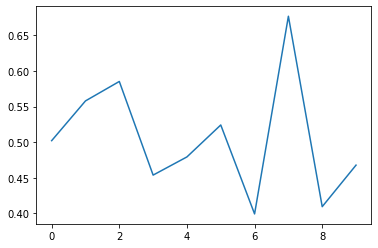

In [8]:
plt.plot(trialXtrial.accuracy)

In [9]:
from local_sem import SEM,NoSplitSEM
s = SEM()
ns = NoSplitSEM


In [10]:
s._calculate_unnormed_sCRP

<bound method SEM._calculate_unnormed_sCRP of <local_sem.SEM object at 0x1448fc690>>

In [11]:
s._update_state

<bound method BaseSEM._update_state of <local_sem.SEM object at 0x1448fc690>>